# Sales Analysis

In [89]:
# Import necessary libraries
import pandas as pd
import os

#### Task 1: Merge the 12 months of sales data into a single csv file

In [2]:
files = [file for file in os.listdir('./sales_data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./sales_data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
# Save as single file
all_months_data.to_csv("all_data.csv" , index = False)

### Read in updated dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# Viewing the shape of the dataframe
all_data.shape

(186850, 6)

### Data Wrangling

In [5]:
# Finds rows that have Nan values
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
nan_df.shape

(545, 6)

In [7]:
# Drop rows with Nan values
all_data = all_data.dropna(how='all')

In [8]:
# Find 'Or' and filter out
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [9]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [10]:
## Quantity Ordered and Price Each , should be int and float respectily
## to_numeric auto convert 
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Question 1: What was the best month for sales ? How much was earned that month?

In [28]:
# Add month column
all_data['Month'] = all_data['Order Date'].str[0:2] # return the first two string on 'Order Date' column
all_data['Month'] = all_data['Month'].astype('int32') # Convert str to int

In [29]:
# Add a sales column 
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [31]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [32]:
# Feedback: December made a lot os sales with 4.613443e+06

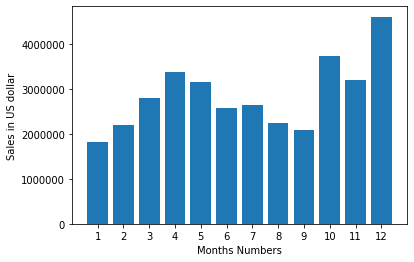

In [33]:
## Plot the result
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months , results['Sales'])
plt.xticks(months) # Show every month
plt.ylabel('Sales in US dollar')
plt.xlabel('Months Numbers')
plt.show()

In [ ]:
# What did we do priory to 4th month that improves our sales?
# perhaps we spend more money on ads ?
# look for collerations

#### Question 2: What city had the highest number of sales ?

In [21]:
# get city name fromm the address 
# add a city column
def get_city(city):
    return city.split(',')[1] # grap the second index which contain the city name

# Get the province or state
def get_state(state):
    return state.split(',')[2].split(' ')[1]

# Join the city name and state abbreviation
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [34]:
City_results = all_data.groupby('City')['Sales'].sum()
City_results

City
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64

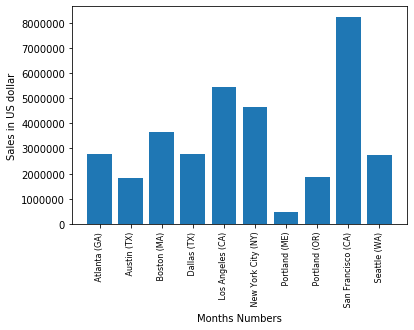

In [40]:
## Plot the result
cities = [city for city ,df in all_data.groupby('City')] # In the order we groupby above

plt.bar(cities , City_results)
plt.xticks(cities , rotation ='vertical', size =8) # Show every month
plt.ylabel('Sales in US dollar')
plt.xlabel('Months Numbers')
plt.show()

#### Question 3: What time/hour should we display ads to maximize likelihood of customer's buying product?

In [41]:
# Convert 'Order Date' from string to datetime
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [55]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

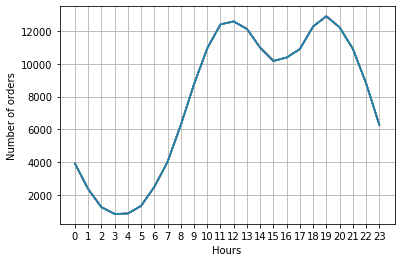

In [58]:
# Plot the distribution
hours =[hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours , all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

In [ ]:
# My recommendation is around 11am -12am and 18pm - 20pm

#### Question 4: What products are most often sold together?

In [65]:
# Keep order ID that have two or more product
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [66]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\Student 24\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
df = df[['Order ID' , 'Grouped']].drop_duplicates()

In [79]:
### Get the most sold as 2 items together
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
# 10 most common
for key , value in count.most_common(10):
    print(key , value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most ? 

In [82]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered.head(5)

Product
20in Monitor               4129
27in 4K Gaming Monitor     6244
27in FHD Monitor           7550
34in Ultrawide Monitor     6199
AA Batteries (4-pack)     27635
Name: Quantity Ordered, dtype: int64

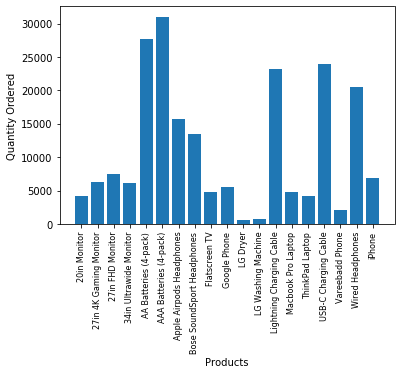

In [88]:
# Plot the graph
products = [product for product , df in product_group] # get all the unique product
plt.bar(products , quantity_ordered)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation='vertical', size= 8)
plt.show()